<center>
<img src="https://2223moodle.isel.pt/pluginfile.php/1/theme_adaptable/logo/1631635830/logo-isel_inv3.png" width="250">
<h3>Licenciatura em Engenharia Informática e Multimédia</h3><br>
<br>
<h2>Processamento de Imagem e Visão (PIV)</h3>
<h3>1º Trabalho Laboratorial – Contagem e Classificação de Peças de Lego Retangulares </h3> 
<br>

<br>
Trabalho Realizado por:<br>
Gonçalo Silva <b>A48328</b><br>
Diogo Lobo <b>A48168</b><br>
Turma 52D<br><br>
Docente: João Pedro Costa <br> 
<br>
11 de Outubro 2024
</center>


# Estrutura do trabalho segundo os slides (Remover no fim)


Algumas notas:
1. Sugestão de organização do relatório:

Capa;

Índice;

Introdução;

Desenvolvimento

Descrição e justificação das opções tomadas e dos
métodos utilizados;

Resultados Experimentais; 

Conclusões;

Bibliografia.

2. Justificar todas opções tomadas, nomeadamente, as
transformações aplicadas e a definição dos elementos estruturantes (mas todas, não só estas)

3. Pode fazer-se em notebook Jupyter, mas deve estar organizado como um relatório

***
<br>
<a id='section0'></a>
<center><h2><b>Índice</b></h2></center>

- [Introdução;](#section1)

***
<a id='section1'></a>
## <center><b>Introdução</b></center>
<div style="text-align: justify">
<h3> Enquadramento </h3>

No contexto da Unidade Curricular de Processamento de Imagem e Visão, foi proposto como primeiro trabalho prático o desenvolvimento de um algoritmo capaz  de  contar  automaticamente  o  número de peças de Lego retangulares, colocado em cima de uma mesa;<br>
    
Este projeto tem como objetivo consolidar o conhecimento prévio da biblioteca de funções OpenCV, e aplicar os novos conhecimentos que adquirimos nas aulas práticas, tais como a identificação e classificação de objetos, para programação de aplicações de visão por computador em tempo real.<br>

<h3> Objetivo </h3>

Pretende-se desenvolver um algoritmo para contagem das peças retangulares de lego 
(dimensões  “2x2”, “2x4”, “2x6” e ”2x8”),  colocadas  em  cima  de  uma  mesa  de  superfície homogénea e clara, observadas por uma câmara, montada num tripé, ajustada de modo que o plano  do  sensor  seja  paralelo  ao  plano  da  mesa. 

O algoritmo deverá possuir alguma robustez relativamente às seguintes perturbações:  
(i) presença de outras peças de Lego no campo de visão; (ii) existência de sombras; (iii) eventual 
contacto entre peças

<h3> Métodos </h3>

Para o desenvolvimento do algoritmo, foram fornecidas várias imagens como parte do "Conjunto de Treino", que servirão para treinar o algoritmo. Posteriormente, os docentes usarão um "Conjunto de Teste" para avaliar o desempenho do algoritmo, e por isso é fundamental assegurar que este funciona bem para todo o conjunto de treino, de modo a tentar minimizar qualquer problema que possa surgir mais tarde na fase de teste.<br>

Neste relatório, detalharemos o processo de implementação do algoritmo passo a passo, apresentando os resultados obtidos para todas as imagens fornecidas com as devidas justificações, para facilitar a compreensão do funcionamento do algoritmo.
</div>

# Processo

<img src="process.png" width="500">

In [231]:
# Imports
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.linalg as la
import cv2
import os

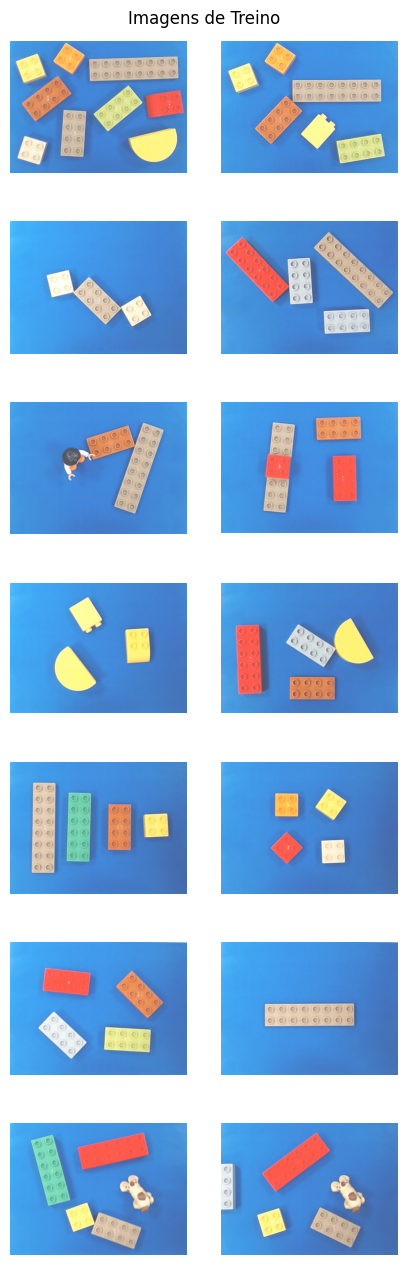

In [232]:
#Diretoria das imagens de treino
images_dir = 'treino/'

images = []
#Obter os nomes dos ficheiros das imagens
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

#Ler as imagens de treino e adicionar ao array 'images'
for image_file in image_files:
    img = cv2.imread(images_dir + image_file)

    if img is not None:
        images.append(img)
    else:
        print("Unable to read image:", image_file)

#Representação das imagens de treino
plt.figure(figsize=(5,16))
plt.title("Imagens de Treino")
plt.axis('off')

for i, image in enumerate(images[:14]):
    plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

In [233]:
# backImages = []
# for color in images:
#     mask = cv2.inRange(cv2.cvtColor(color,cv2.COLOR_BGR2RGB),np.array([47,85,101]),np.array([99,149,231]))
#     mask = 255-mask
#     mask = cv2.cvtColor(mask,cv2.COLOR_GRAY2RGB)
#     imageOut = cv2.multiply(color/255,mask/255)
#     imageOut = (imageOut * 255).astype(np.uint8)
#     backImages.append(imageOut)

# #Representação das imagens de treino
# plt.figure(figsize=(5,16))
# plt.title("Imagens de Treino em tons de cinzento")
# plt.axis('off')

# for i, image in enumerate(backImages):
#     plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
#     plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
#     plt.axis('off') 

# plt.show()

In [234]:
# backImages = []

# for color in images:
#     lower_blue = np.array([100, 100, 100])  # Adjust these values as needed
#     upper_blue = np.array([130, 255, 255])  # Adjust these values as needed

#     # Create a mask for the blue color
#     mask = cv2.inRange(color, lower_blue, upper_blue)

#     # Invert the mask to get the Lego pieces
#     mask_inverted = cv2.bitwise_not(mask)

#     # Apply the inverted mask to the original image
#     result = cv2.bitwise_and(color, color, mask=mask_inverted)

#     # Convert the result to grayscale and then back to RGB to ensure a black background
#     gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
#     result = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
#     backImages.append(result)

# #Representação das imagens de treino
# plt.figure(figsize=(5,16))
# plt.title("Imagens de Treino em tons de cinzento")
# plt.axis('off')

# for i, image in enumerate(backImages):
#     plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
#     plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
#     plt.axis('off') 

# plt.show()

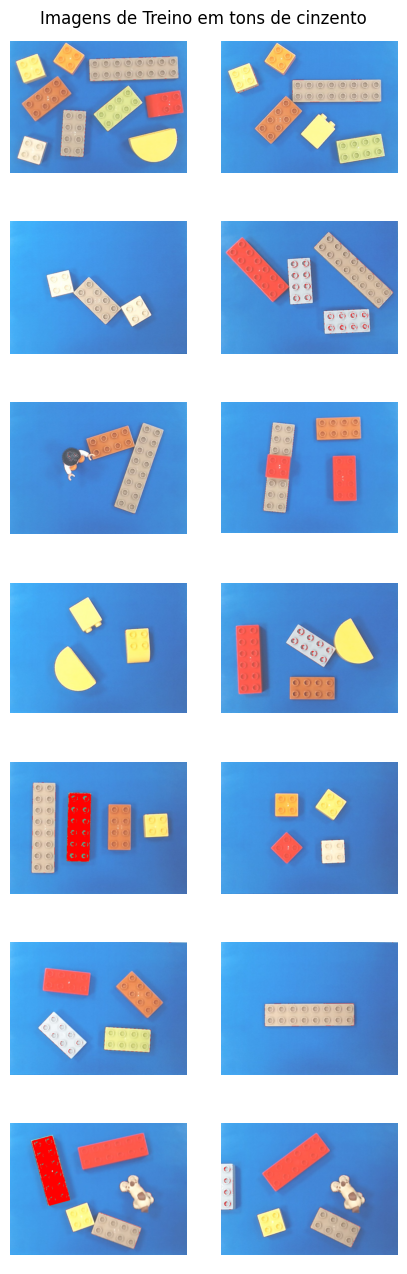

In [235]:
backImages = []
for color in images:
    color = cv2.cvtColor(color,cv2.COLOR_BGR2RGB)
    # Definir o intervalo para a cor azul no espaço BGR (ajuste conforme necessário)
    lower_green = np.array([70, 170, 150])  # Narrower lower bound for green
    upper_green = np.array([180, 240, 210])  # Narrower upper bound for green

    # Criar uma máscara que isola o fundo azul
    mask = cv2.inRange(color, lower_green, upper_green)

    # Inverter a máscara para obter as peças (onde o fundo será removido)
    red_piece = np.zeros_like(color)
    red_piece[:] = [255, 0, 0]  # Set the entire image to red

    # Use the mask to replace the green piece with red while keeping the rest unchanged
    result = np.copy(color)
    result[mask != 0] = red_piece[mask != 0]

    # Convert back to BGR for consistent display with OpenCV
    result_bgr = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
    
    backImages.append(result_bgr)

#Representação das imagens de treino
plt.figure(figsize=(5,16))
plt.title("Imagens de Treino em tons de cinzento")
plt.axis('off')

for i, image in enumerate(backImages):
    plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    plt.axis('off') 

plt.show()

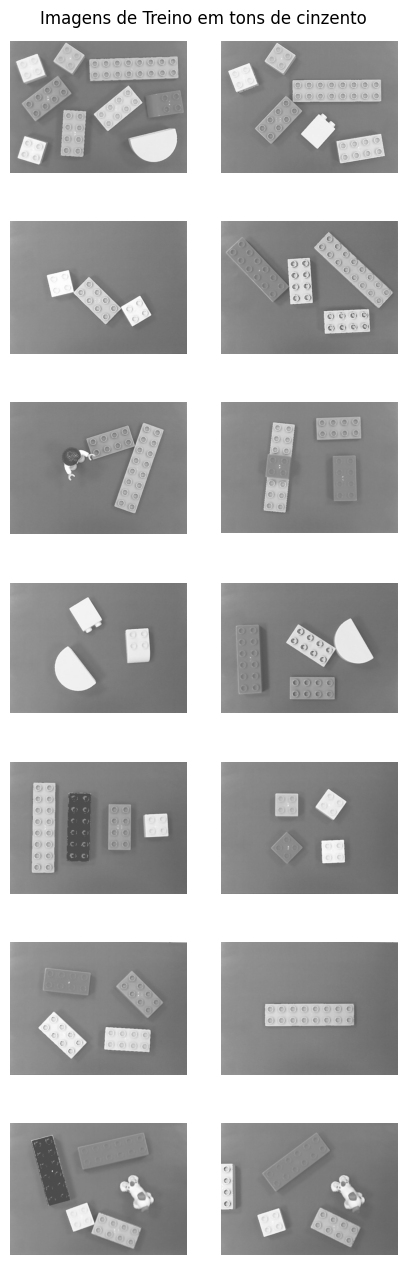

In [236]:
grayscale_images = []

# Iterar sobre cada imagem a cores e passar para níveis de cinzento
for color_img in backImages:
    grayscale_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    
    grayscale_images.append(grayscale_img)



#Representação das imagens de treino
plt.figure(figsize=(5,16))
plt.title("Imagens de Treino em tons de cinzento")
plt.axis('off')

for i, image in enumerate(grayscale_images):
    plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

(530, 706, 3)


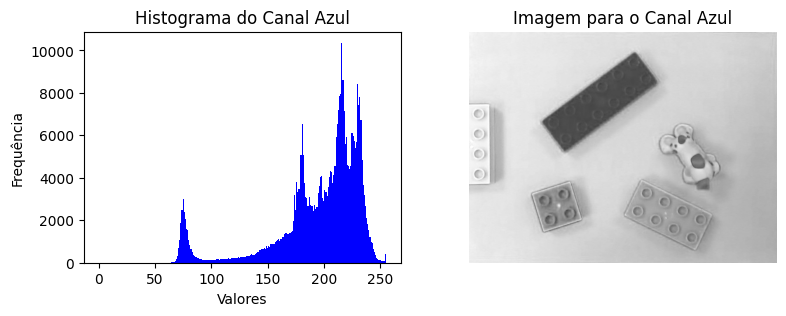

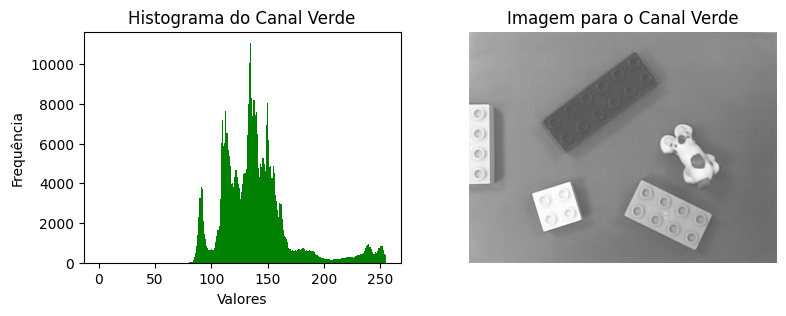

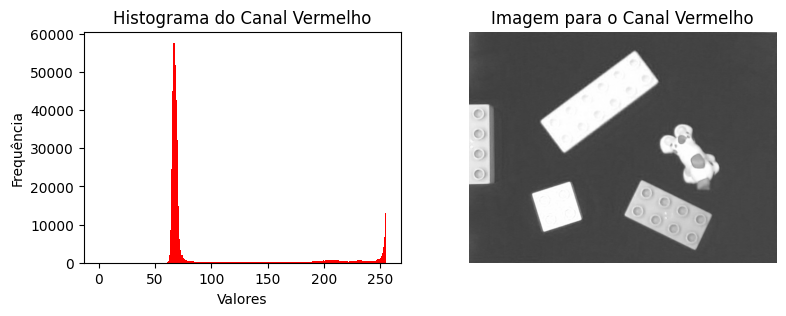

In [237]:
# imageGray = cv2.cvtColor(imageFinal,cv2.COLOR_RGB2GRAY)
# imageGray = cv2.cvtColor(imageFinal,cv2.COLOR_RGB2GRAY)

colorC = ('b','g','r') 
colorN = np.array(['Azul','Verde','Vermelho'])   

#valores de quantificação (0-255)
vq = np.arange(0, 256)

#Histograma para cada canal de cor e respetiva imagem para cada canal
#Canal 0 -> Azul
#Canal 1 -> Verde
#Canal 2 -> Vermelho

print(img.shape)

for i,c in enumerate(colorC):
    plt.figure(figsize=(9,3))
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(121)
    plt.bar(vq,np.squeeze(histr),color = c, width = 1)
    plt.title('Histograma do Canal ' +  colorN[i])
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.subplot(122)
    plt.title('Imagem para o Canal ' +  colorN[i])
    plt.imshow(cv2.cvtColor(img[:,:,i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


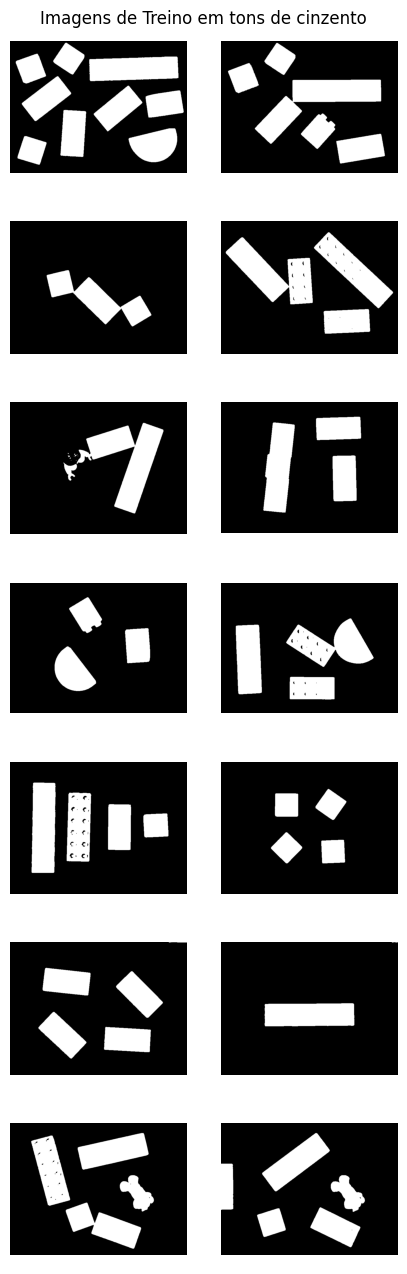

In [238]:
binImages = []
i = 1
output_dir = 'output_images'
for image in backImages:
    aux = cv2.GaussianBlur(image[:,:,2],(5,5),0)
    res, thresh = cv2.threshold(aux,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,15
    # ,2)
    binImages.append(thresh)

    filename = os.path.join(output_dir, f'thresh_image_{i}.png')
    
    # Save the morph image
    cv2.imwrite(filename, thresh)
    i+=1

plt.figure(figsize=(5,16))
plt.title("Imagens de Treino em tons de cinzento")
plt.axis('off')

for i, image in enumerate(binImages):
    plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

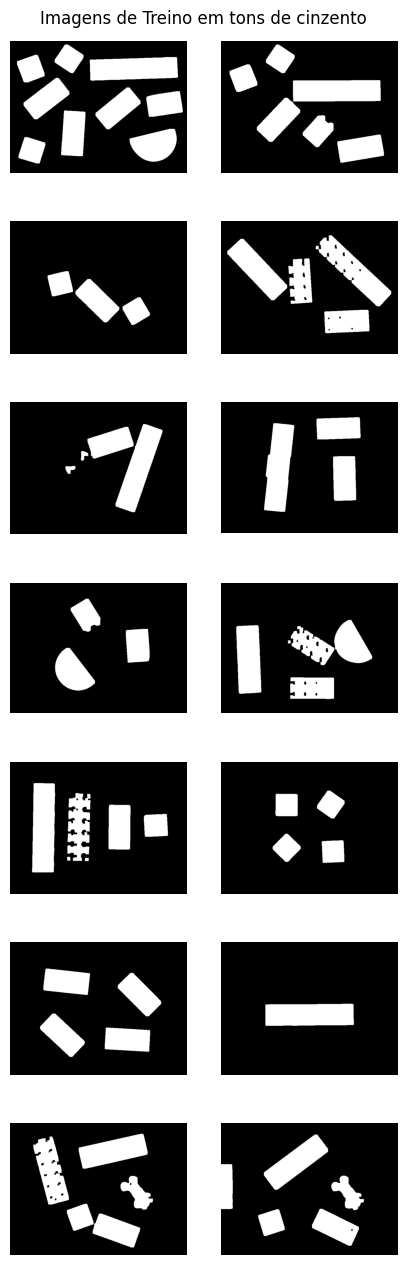

In [239]:
morphImages = []
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
output_dir = 'output_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

i = 0

for binImage in binImages:
    # Step 1: Erode to separate the connected pieces
    morph = cv2.erode(binImage, kernel, iterations=7)

    # Step 2: Dilate after erosion to recover the original size
    morph = cv2.dilate(morph, kernel, iterations=5)

    morphImages.append(morph)
    filename = os.path.join(output_dir, f'morph_image_{i}.png')
    
    # Save the morph image
    cv2.imwrite(filename, morph)
    i+=1

#Representação das imagens de treino
plt.figure(figsize=(5,16))
plt.title("Imagens de Treino em tons de cinzento")
plt.axis('off')

for i, image in enumerate(morphImages):
    plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

Number of Contours found = 1 9
Number of Contours found = 2 6
Number of Contours found = 3 3
Number of Contours found = 4 4
Number of Contours found = 5 4
Number of Contours found = 6 3
Number of Contours found = 7 3
Number of Contours found = 8 5
Number of Contours found = 9 6
Number of Contours found = 10 4
Number of Contours found = 11 4
Number of Contours found = 12 1
Number of Contours found = 13 5
Number of Contours found = 14 5


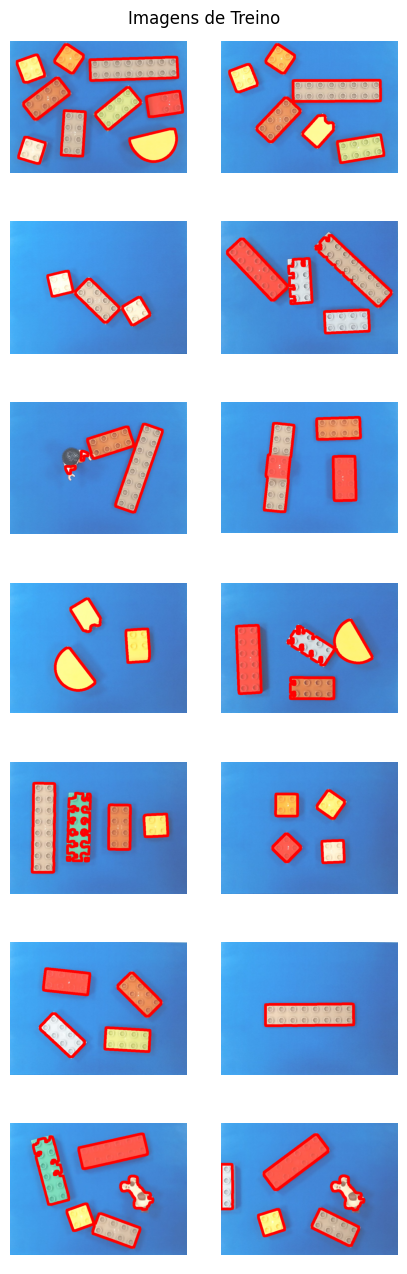

In [240]:
i=0
for image in morphImages:
    
    contours, hierarchy = cv2.findContours(image,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    print("Number of Contours found = " + str(i+1) + ' ' + str(len(contours))) 
    cv2.drawContours(images[i],contours,-1,(0,0,255),10)
    i+=1
#Representação das imagens de treino
plt.figure(figsize=(5,16))
plt.title("Imagens de Treino")
plt.axis('off')

for i, image in enumerate(images[:14]):
    plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()